In [2]:
from matplotlib import pyplot as plt
import platform, os, sys, h5py
import numpy as np
from tabulate import tabulate
from pprint import pprint
from tqdm import tqdm

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\Gerwin\Documents\Code')
    from BEMHelper import interpolate_slow
else:
    sys.path.append('/mnt/s/_Data/160603 - EonHe M016v5/modules')
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    %config InlineBackend.figure_format='retina'

from Common import common, kfit
from TrapAnalysis import trap_analysis, import_data, artificial_anneal as anneal
from HeliumSurface.static_surface import *
from ipywidgets import interact

%matplotlib inline

In [3]:
def chi(omega_drive, omega_ij, g_ij, n_i, n_j, gamma_ij):
# For most of the population in the ground state: n_i = 0
#     n_i = 0
    return g_ij**2 * (n_j - n_i) / (omega_drive - omega_ij + 1j * gamma_ij)

In [4]:
def signal(omega_0, omega_drive, kappa_i, kappa_c, susceptibility):
    return 2 * np.sqrt(kappa_c/2. * kappa_c/2.) / (omega_drive - omega_0 + 1j * (kappa_i + kappa_c) - susceptibility)

In [5]:
omega_0 = 2 * np.pi * 6.4E9
omega_e = 2 * np.pi * np.linspace(6E9, 7E9, 10001)
kappa_i = omega_0 / 40E3
kappa_c = omega_0 / 1.5E3

detunings = np.linspace(-20 * kappa_c, 20 * kappa_c, 101)
omega_drive = omega_0  + detunings

susceptibility = np.zeros((len(detunings), len(omega_e)), dtype=np.complex128)
s = np.zeros((len(detunings), len(omega_e)), dtype=np.complex128)

gs_pop = 0.0
es_pop = 1.0
g_ij = 2 * np.pi * 20e6
gamma_ij = 2* np.pi * 20E6

for k, omega_d in enumerate(omega_drive):
    susceptibility[k, :] = chi(omega_d, omega_e, g_ij, gs_pop, es_pop, gamma_ij)
    s[k, :] = np.conjugate(signal(omega_0, omega_d, kappa_i, kappa_c, susceptibility[k, :]))
    
print("g = ", g_ij / (2*np.pi*1e6), " MHz")
print("k = ", (kappa_c + kappa_i*2) / (2*np.pi*1e6), " MHz")
print("gamma = ", gamma_ij / (2*np.pi*1e6), " MHz")

g =  20.000000000000004  MHz
k =  4.586666666666667  MHz
gamma =  20.000000000000004  MHz


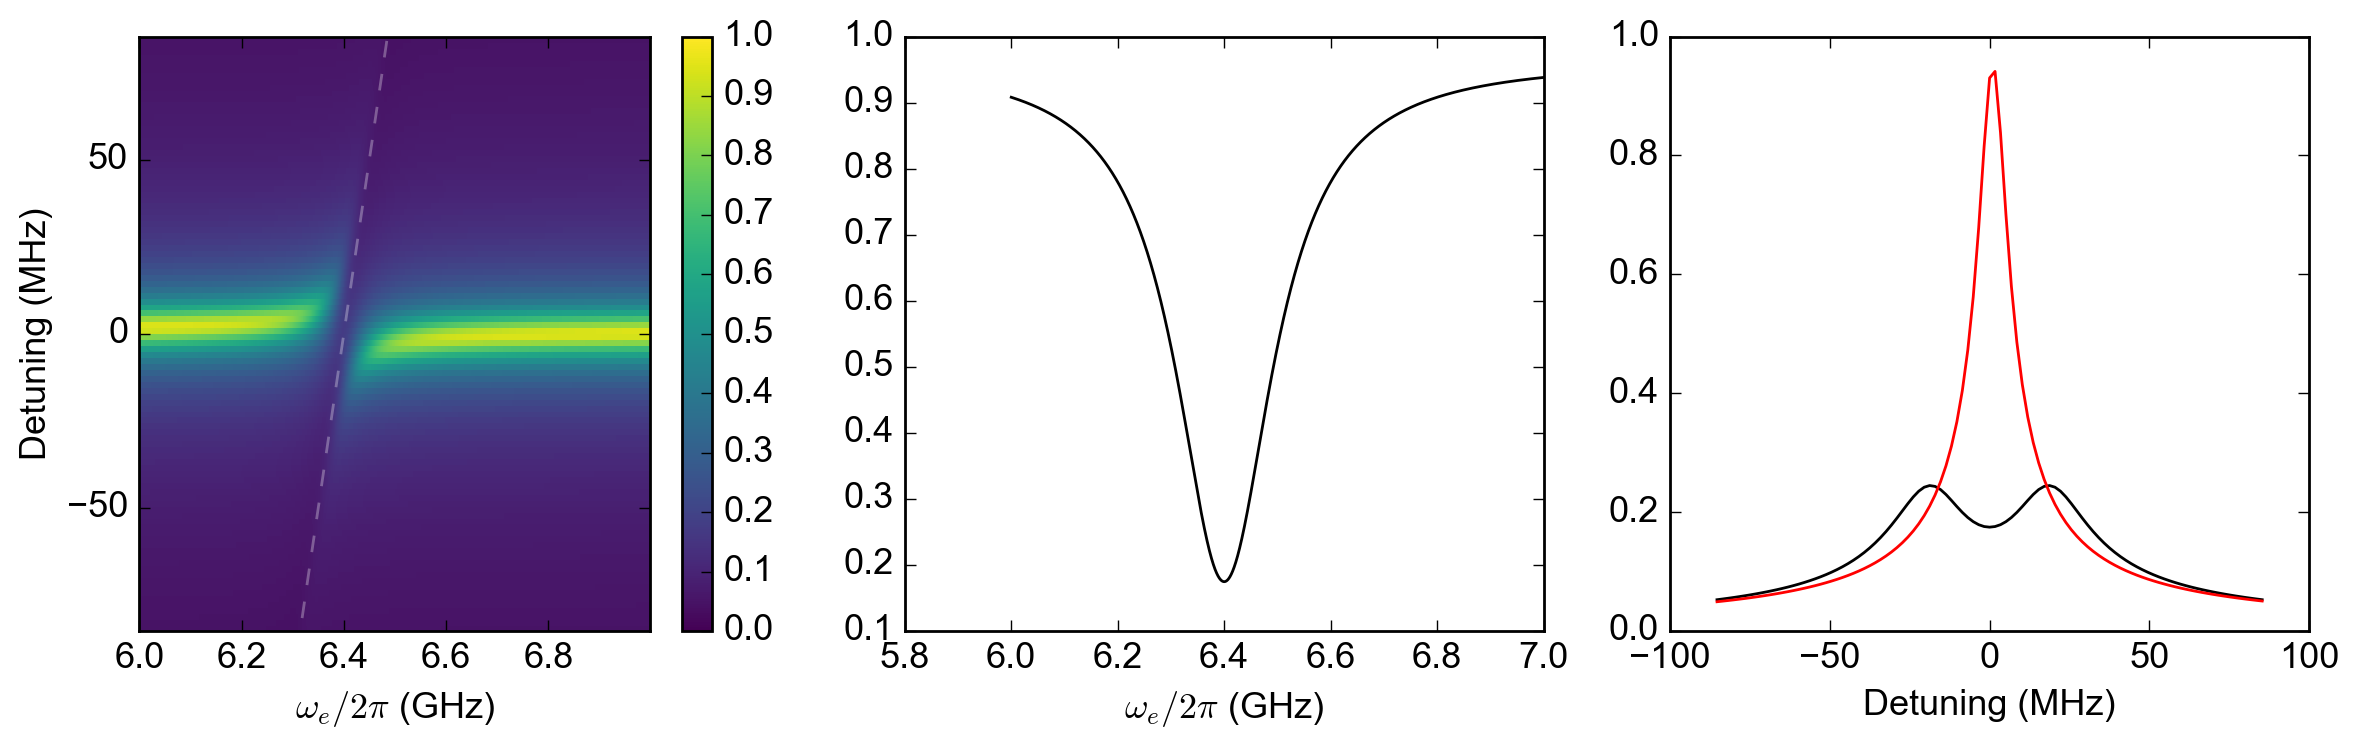

In [13]:
fig = plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.subplot(131)

plt.pcolormesh(omega_e/(2*np.pi*1E9), detunings/(2*np.pi*1E6), np.abs(s), cmap=plt.cm.viridis)
plt.xlabel("$\omega_e/2\pi$ (GHz)")
plt.ylabel("Detuning (MHz)")
plt.xlim(np.min(omega_e/(2*np.pi*1E9)), np.max(omega_e/(2*np.pi*1E9)))
plt.ylim(np.min(detunings/(2*np.pi*1E6)), np.max(detunings/(2*np.pi*1E6)))
plt.colorbar()
plt.clim(0, 1)
plt.plot(omega_e/(2*np.pi*1E9), (omega_e-omega_0)/(2*np.pi*1E6), '--', color='white', alpha=0.3)

det_oi = common.find_nearest(detunings/(2*np.pi), 0.0)

plt.subplot(132)
plt.plot(omega_e/(2*np.pi*1E9), np.imag(s)[det_oi, :], '-k')
plt.xlabel("$\omega_e/2\pi$ (GHz)")

plt.subplot(133)
omega_e_oi = common.find_nearest(omega_e, omega_0)
plt.plot(detunings/(2*np.pi*1E6), np.abs(s)[:, omega_e_oi], '-k')

omega_e_oi = common.find_nearest(omega_e, 2*np.pi*6E9)
plt.plot(detunings/(2*np.pi*1E6), np.abs(s)[:, omega_e_oi], '-r')

plt.xlabel("Detuning (MHz)")

plt.tight_layout()

## Current situation

In [23]:
omega_0 = 2 * np.pi * 6.4E9
omega_e = 2 * np.pi * np.linspace(5E9, 8E9, 10001)
kappa_i = omega_0 / 40E3
kappa_c = omega_0 / 13E3

detunings = np.linspace(-10 * kappa_c, 10 * kappa_c, 101)
omega_drive = omega_0  + detunings

susceptibility = np.zeros((len(detunings), len(omega_e)), dtype=np.complex128)
s = np.zeros((len(detunings), len(omega_e)), dtype=np.complex128)

gs_pop = 0.0
es_pop = 1.0
g_ij = 2 * np.pi * 10e6
gamma_ij = 2* np.pi * 200E6

for k, omega_d in enumerate(omega_drive):
    susceptibility[k, :] = chi(omega_d, omega_e, g_ij, gs_pop, es_pop, gamma_ij)
    s[k, :] = np.conjugate(signal(omega_0, omega_d, kappa_i, kappa_c, susceptibility[k, :]))
    
print("g = ", g_ij / (2*np.pi*1e6), " MHz")
print("k = ", (kappa_c + kappa_i*2) / (2*np.pi*1e6), " MHz")
print("gamma = ", gamma_ij / (2*np.pi*1e6), " MHz")

g =  10.000000000000002  MHz
k =  0.8123076923076923  MHz
gamma =  200.0  MHz


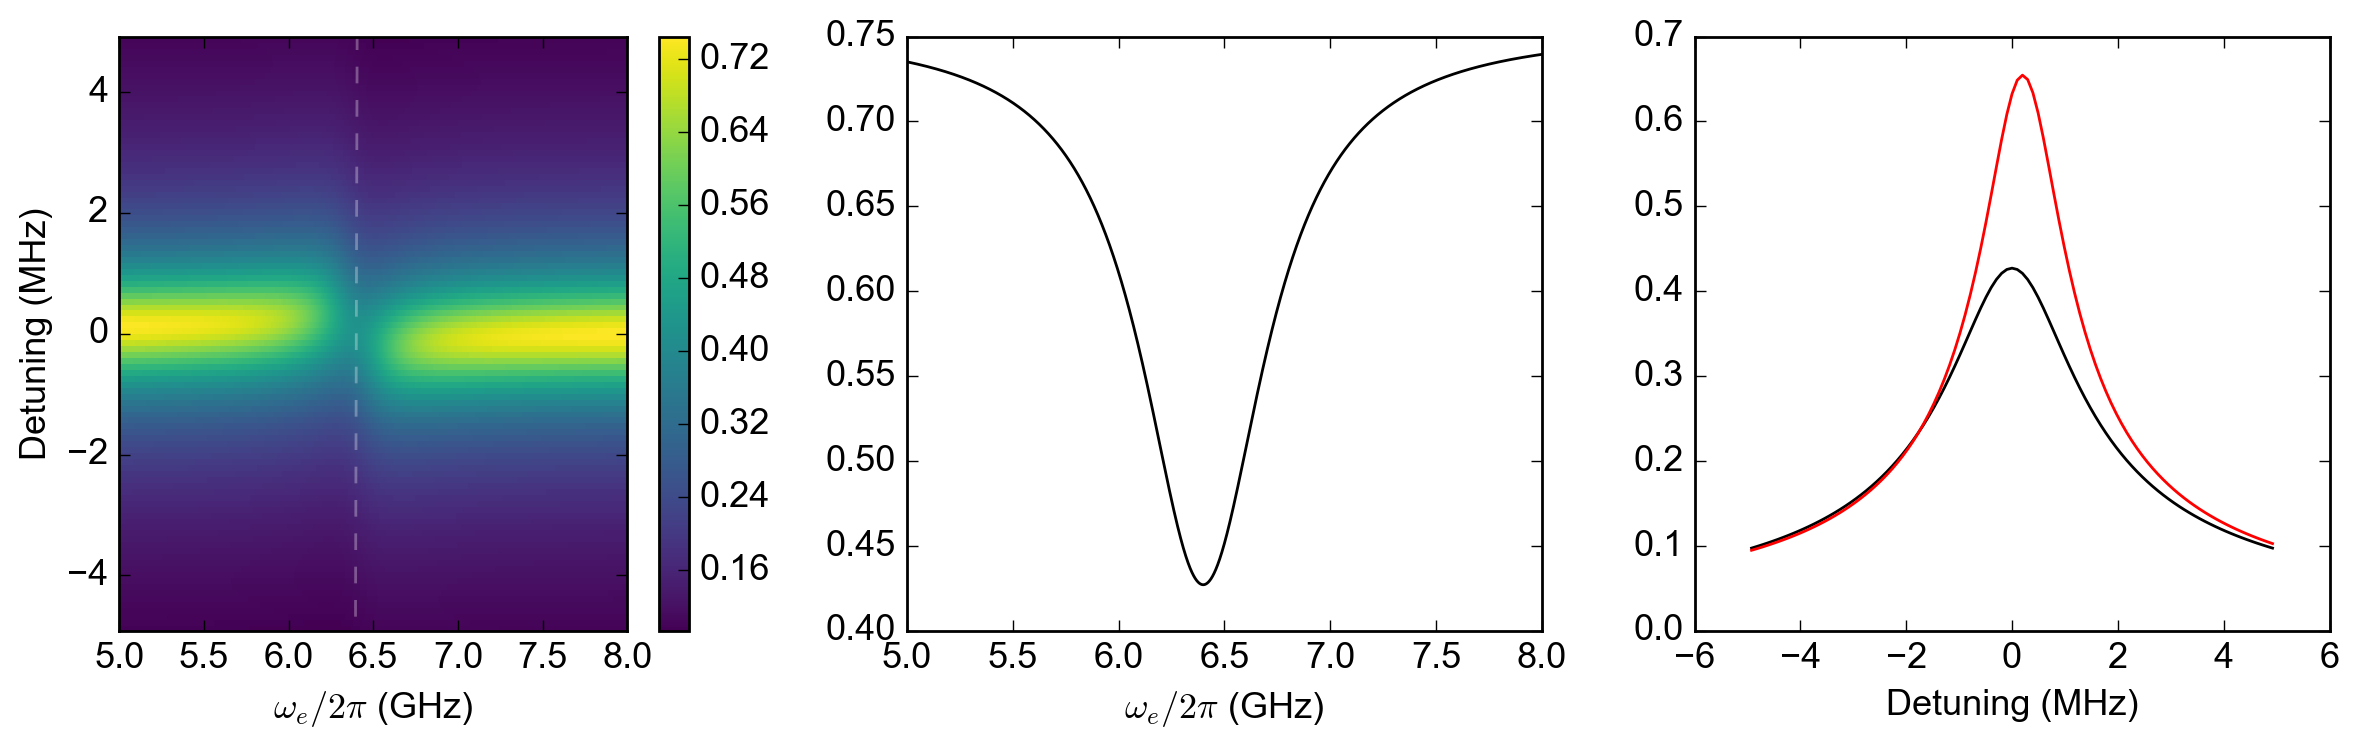

In [25]:
fig = plt.figure(figsize=(12.,4.))
common.configure_axes(13)
plt.subplot(131)

plt.pcolormesh(omega_e/(2*np.pi*1E9), detunings/(2*np.pi*1E6), np.abs(s), cmap=plt.cm.viridis)
plt.xlabel("$\omega_e/2\pi$ (GHz)")
plt.ylabel("Detuning (MHz)")
plt.xlim(np.min(omega_e/(2*np.pi*1E9)), np.max(omega_e/(2*np.pi*1E9)))
plt.ylim(np.min(detunings/(2*np.pi*1E6)), np.max(detunings/(2*np.pi*1E6)))
plt.colorbar()
# plt.clim(0, 1)
plt.plot(omega_e/(2*np.pi*1E9), (omega_e-omega_0)/(2*np.pi*1E6), '--', color='white', alpha=0.3)

det_oi = common.find_nearest(detunings/(2*np.pi), 0.0)

plt.subplot(132)
plt.plot(omega_e/(2*np.pi*1E9), np.imag(s)[det_oi, :], '-k')
plt.xlabel("$\omega_e/2\pi$ (GHz)")

plt.subplot(133)
omega_e_oi = common.find_nearest(omega_e, omega_0)
plt.plot(detunings/(2*np.pi*1E6), np.abs(s)[:, omega_e_oi], '-k')

omega_e_oi = common.find_nearest(omega_e, 2*np.pi*6E9)
plt.plot(detunings/(2*np.pi*1E6), np.abs(s)[:, omega_e_oi], '-r')

plt.xlabel("Detuning (MHz)")

plt.tight_layout()